In [16]:
# from scripts.analytics import Analytics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# calculadora =  Analytics()

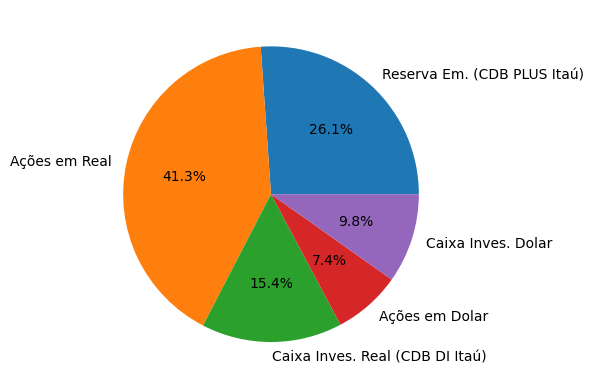

In [10]:
labels = 'Reserva Em. (CDB PLUS Itaú)', 'Ações em Real', 'Caixa Inves. Real (CDB DI Itaú)', 'Ações em Dolar', 'Caixa Inves. Dolar'
sizes = [26.11, 41.28, 15.39, 7.41, 9.8]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_facecolor(color=None)
plt.savefig('img/foo.png')

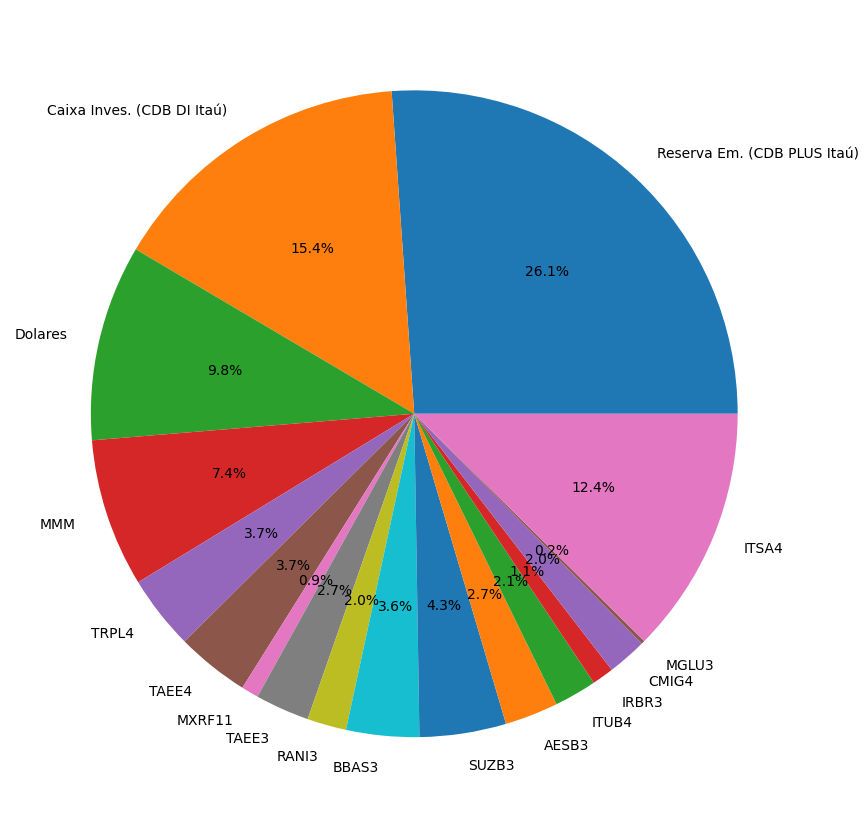

In [22]:
labels = ['Reserva Em. (CDB PLUS Itaú)', 'Caixa Inves. (CDB DI Itaú)', 'Dolares', 'MMM', 'TRPL4', 'TAEE4',
           'MXRF11', 'TAEE3', 'RANI3', 
          'BBAS3', 'SUZB3', 'AESB3', 'ITUB4', 'IRBR3', 'CMIG4', 'CMIG4', 'ITSA4']
sizes = [33.08040, 19.50348, 12.41185, 9.38815, 4.696, 4.628, 
         1.093, 3.432, 2.480, 
         4.615, 5.475, 3.387, 2.681, 1.376,
         2.494, 0.213, 15.7168]

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_facecolor(color=None)
plt.savefig('img/foo2.png', dpi=100)

In [2]:
def print_report(dono:str):
    res = calculadora.calcular_patrimonio(dono=dono)
    cdi = calculadora.calcular_cdi_proventos(dono=dono)
    ativos = calculadora.calcular_valorizacao_ativos(dono=dono)
    proventos = calculadora.calcular_ativos_proventos(dono=dono)
    
    dolar_hoje = res['dolar_hoje']

    print(f"""
    -------- {dono.title()} Patrimonio --------
    
    Patrimonio total: R${res['patrimonio_total']:,.2f}

    Moeda Real: R${res['patrimonio_moeda_real']:,.2f}
    Ativos Real: R${res['patrimonio_ativos_real']:,.2f}
    Moeda Dolar: ${res['patrimonio_moeda_dolar']:,.2f} (R${res['patrimonio_moeda_dolar']*dolar_hoje:,.2f})
    Ativos Dolar: ${res['patrimonio_ativos_dolar']:,.2f} (R${res['patrimonio_ativos_dolar']*dolar_hoje:,.2f})

    ---------- Detalhamento ----------
    """)


    col_1 = []
    col_2 = []
    col_3 = []
    col_4 = []
    for key, caixa in cdi.items():
        
        if cdi[key]["valor"] <= 0:
            continue

        rendimento_p = (cdi[key]["rendimento"]/cdi[key]["valor"])*100

        col_1.append(key)
        col_2.append(f'R$ {cdi[key]["valor"]:,.2f}')
        col_3.append(f'% {rendimento_p:,.2f}')
        col_4.append(f'R$ {cdi[key]["rendimento"]:,.2f}')

    df_cdi = pd.DataFrame()
    df_cdi['caixa'] = col_1
    df_cdi['valor'] = col_2
    df_cdi['rendimento %'] = col_3
    df_cdi['rendimento'] = col_4

    print(df_cdi.to_string(index=False))
    print('')

    col_1 = []
    col_2 = []
    col_3 = []
    col_4 = []
    valorizacao_carteira = {'investido': 0, 'valor_atual': 0, 'proventotos': 0}
    for key, ativo in ativos.items():
        prov = 0
        if key in proventos:
            prov = proventos[key]['proventos']

        valor = ativo['price_today'] * ativo['quantidade']
        valorizacao = ativo['valorizacao'] * 100

        if key in ['MMM']:
            valorizacao_carteira['investido'] += ativo['valor_investido'] * dolar_hoje
            valorizacao_carteira['valor_atual'] += valor * dolar_hoje
            valorizacao_carteira['proventotos'] += prov * dolar_hoje
        else:
            valorizacao_carteira['investido'] += ativo['valor_investido']
            valorizacao_carteira['valor_atual'] += valor
            valorizacao_carteira['proventotos'] += prov

        if key in ['MMM']:
            tipo_m = '$'
        else:
            tipo_m = 'R$'

        col_1.append(key)
        col_2.append(f'{tipo_m} {valor:,.2f}')
        col_3.append(f'% {valorizacao:,.2f}')
        col_4.append(f'{tipo_m} {prov:,.2f}')

    df_ativos = pd.DataFrame()
    df_ativos['ativo'] = col_1
    df_ativos['valor'] = col_2
    df_ativos['valorização'] = col_3
    df_ativos['proventos'] = col_4

    print(df_ativos.to_string(index=False))

    ativos_valor_atual_mais_proventos = valorizacao_carteira['valor_atual'] + valorizacao_carteira['proventotos']
    ativos_valorizacao = ((valorizacao_carteira['valor_atual']/valorizacao_carteira['investido'])-1)*100
    ativos_valorizacao_mais_proventos = (((valorizacao_carteira['valor_atual']+valorizacao_carteira['proventotos'])/valorizacao_carteira['investido'])-1)*100
    print(f"""
    
    -------- {dono.title()} Carteira --------

    Investido: R${valorizacao_carteira['investido']:,.2f}

    Valor atual: R${valorizacao_carteira['valor_atual']:,.2f}
    Proventos: R${valorizacao_carteira['proventotos']:,.2f}
    Valor atual + Proventos: R${ativos_valor_atual_mais_proventos:,.2f}

    Valorização: %{ativos_valorizacao:,.2f}
    Valorização + Proventos: %{ativos_valorizacao_mais_proventos:,.2f}

    """)

    


In [4]:
print_report('rodrigo')


    -------- Rodrigo Patrimonio --------
    
    Patrimonio total: R$112,565.13

    Moeda Real: R$49,262.00
    Ativos Real: R$41,523.75
    Moeda Dolar: $2,467.94 (R$12,027.51)
    Ativos Dolar: $2,001.00 (R$9,751.87)

    ---------- Detalhamento ----------
    
        caixa        valor rendimento % rendimento
CDB PLUS Itaú R$ 16,481.00       % 0.00    R$ 0.00
  CDB DI Itaú R$ 32,781.00       % 0.00    R$ 0.00

ativo        valor valorização proventos
  MMM   $ 2,001.00     % -2.22   $ 21.00
TAEE3  R$ 3,510.00    % -11.56 R$ 230.56
MGLU3    R$ 252.00    % -28.21   R$ 0.00
CMIG4  R$ 2,610.00     % 12.02  R$ 46.61
IRBR3  R$ 1,331.55     % 33.15   R$ 7.41
BBAS3  R$ 4,732.00     % 30.00 R$ 372.01
ITUB4  R$ 2,727.00      % 0.55  R$ 53.32
ITSA4 R$ 16,403.20      % 4.01 R$ 316.54
SUZB3  R$ 5,278.00      % 5.98   R$ 0.00
TAEE4  R$ 4,680.00      % 0.09   R$ 0.00

    
    -------- Rodrigo Carteira --------

    Investido: R$49,402.13

    Valor atual: R$51,275.62
    Proventos: R$1,128.79

In [5]:
print_report('dayane')


    -------- Dayane Patrimonio --------
    
    Patrimonio total: R$16,413.47

    Moeda Real: R$11,855.38
    Ativos Real: R$0.00
    Moeda Dolar: $435.03 (R$2,120.12)
    Ativos Dolar: $500.25 (R$2,437.97)

    ---------- Detalhamento ----------
    
        caixa        valor rendimento % rendimento
robank_dayane R$ 11,855.38       % 2.32  R$ 275.31

ativo    valor valorização proventos
  MMM $ 500.25     % -2.22    $ 5.25

    
    -------- Dayane Carteira --------

    Investido: R$2,493.28

    Valor atual: R$2,437.97
    Proventos: R$25.59
    Valor atual + Proventos: R$2,463.55

    Valorização: %-2.22
    Valorização + Proventos: %-1.19

    


In [56]:
import mouse
from time import sleep
from tqdm import tqdm

def char():
    mouse.move(700, 900)
    mouse.click('left')
    sleep(0.5)
    mouse.move(750, 800)
    mouse.click('left')
    sleep(0.5)
    mouse.move(600, 950)
    mouse.click('left')
    sleep(0.5)
    mouse.click('left')
    sleep(2)
    mouse.click('left')
    sleep(2)
    mouse.click('left')
    sleep(3)

def act():
    mouse.move(500, 900)
    mouse.click('left')
    sleep(0.5)
    mouse.move(750, 700)
    mouse.click('left')
    sleep(0.5)
    mouse.move(600, 950)
    mouse.click('left')
    sleep(0.5)
    mouse.click('left')
    sleep(2)
    mouse.click('left')
    sleep(2)
    mouse.click('left')
    sleep(3)

def game():
    mouse.move(500, 820)
    mouse.click('left')
    sleep(0.5)
    mouse.click('left')
    sleep(0.5)
    mouse.move(600, 950)
    mouse.click('left')
    sleep(0.5)
    mouse.click('left')
    sleep(2)
    mouse.click('left')
    sleep(2)
    mouse.click('left')
    sleep(2)
    mouse.click('left')
    sleep(2)
    mouse.click('left')
    sleep(3)

def cli():
    mouse.move(600, 950)
    mouse.click('left')
    sleep(0.5)


In [58]:
for i in tqdm(range(10)):
    char()
    #act()
    #game()

for i in tqdm(range(0)):
    cli()



100%|██████████| 10/10 [01:26<00:00,  8.62s/it]
0it [00:00, ?it/s]


In [7]:
import mouse
from time import sleep
from tqdm import tqdm

sleep(3)
for i in tqdm(range(10000)):
    mouse.click('left')


100%|██████████| 10000/10000 [01:07<00:00, 149.09it/s]


In [24]:
l = [1 ,2 ,3, 4]
for i in l:
 print(i)

1
2
3
4
